In [167]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\111897


In [168]:
import pyodbc
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)#展開所有欄位
pd.set_option('display.max_rows', None)#展開所有欄位

In [169]:
cnxn = pyodbc.connect(driver='{SQL Server}', server='10.11.48.12', database='FZSRD_BD',               
               trusted_connection='yes')

#sql = 'SELECT top 10 * FROM v_customer_數位帳戶客戶'
#sql = "SELECT top 50000 * FROM v_henry_A"
sql = "SELECT * FROM v_henry_A_投資理財"


data=pd.read_sql(sql, cnxn)

print(data.columns)

cnxn.close()

Index(['label', 'Target_Y', 'SEX', 'RAND_ID', 'UNINO', 'ID_NBR', 'ID_ERR',
       'BUS', 'BIRTH', 'EDU', 'F_EXPIRY', 'HOME_ZIP', 'INCOME', 'OWNERSHIP',
       'OCC', 'MARR', 'COMP_NAME', 'STMT_ZIP', 'L_MAINT_DT', 'COMP_ZIP',
       'MAIL_IND', 'PERM_ZIP', 'SYS_DATE', '性別', 'age', '年齡級距', '員工記號', '行業別',
       '行業別_分類', 'bus_edesc', 'OWNER_DESC', '現居地所有權', '教育程度', '現居地_區域',
       'home_dist', '現居地_縣市', 'home_city', '現居地_縣市_英', '年收入', 'Salary',
       'OCC_DESC', '職稱別', 'GRP_DESC', '職稱別_分類', '姻婚狀態', 'marry_status', '公司名稱',
       '資料更新日', '戶籍_區域', 'perm_dist', '戶籍_縣市', 'perm_city', '公司_區域',
       'comp_dist', '公司_縣市', 'comp_city', '星座', '星座_E', '存戶最早開戶日',
       '台外幣總存款餘額_等值台幣', '台幣總存款餘額', '外幣總存款餘額_等值台幣', '台幣定存總存款餘額', 'MMA網銀會員',
       'MMA網路服務記號', '曾登入行動銀行', 'JCIC記號', 'JCIC_無擔保貸款金額_千元',
       'JCIC_無擔保貸款金額_千元_他行', 'JCIC_信用卡_最近分期餘額', 'JCIC_信用卡_最近分期餘額_他行',
       'JCIC_信用卡_最近分期銀行數', 'JCIC_中期貸款餘額', 'JCIC_長期貸款餘額', 'JCIC_授信異常記號',
       'JCIC_近半年增債金額_千元', 'JCIC_他行卡片最高等級', 'JCIC_他行近一年年收入均值

In [194]:
ap_data = data[["性別","SEX","age","年齡級距","行業別_分類","現居地_縣市","戶籍_縣市","Salary","教育程度","姻婚狀態","星座","星座_E","MMA網銀會員","曾登入行動銀行","台幣總存款餘額","外幣總存款餘額_等值台幣","MMA網路服務記號","JCIC_無擔保貸款金額_千元","JCIC_無擔保貸款金額_千元_他行","JCIC_信用卡_最近分期餘額","JCIC_信用卡_最近分期餘額_他行","JCIC_信用卡_最近分期銀行數","JCIC_中期貸款餘額","JCIC_長期貸款餘額","JCIC_他行近一年年收入均值","季投資理財AP_2020Q2","Target_Y","label"]]

ap_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112189 entries, 0 to 112188
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   性別                  112189 non-null  object 
 1   SEX                 112189 non-null  object 
 2   age                 112007 non-null  float64
 3   年齡級距                112189 non-null  object 
 4   行業別_分類              94640 non-null   object 
 5   現居地_縣市              111879 non-null  object 
 6   戶籍_縣市               111880 non-null  object 
 7   Salary              112189 non-null  float64
 8   教育程度                111438 non-null  object 
 9   姻婚狀態                112174 non-null  object 
 10  星座                  112188 non-null  object 
 11  星座_E                112188 non-null  object 
 12  MMA網銀會員             112189 non-null  object 
 13  曾登入行動銀行             112189 non-null  object 
 14  台幣總存款餘額             112189 non-null  float64
 15  外幣總存款餘額_等值台幣        112189 non-nul

In [195]:
ap_data = ap_data.dropna()
ap_data.head(5)
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93855 entries, 0 to 112188
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   性別                  93855 non-null  object 
 1   SEX                 93855 non-null  object 
 2   age                 93855 non-null  float64
 3   年齡級距                93855 non-null  object 
 4   行業別_分類              93855 non-null  object 
 5   現居地_縣市              93855 non-null  object 
 6   戶籍_縣市               93855 non-null  object 
 7   Salary              93855 non-null  float64
 8   教育程度                93855 non-null  object 
 9   姻婚狀態                93855 non-null  object 
 10  星座                  93855 non-null  object 
 11  星座_E                93855 non-null  object 
 12  MMA網銀會員             93855 non-null  object 
 13  曾登入行動銀行             93855 non-null  object 
 14  台幣總存款餘額             93855 non-null  float64
 15  外幣總存款餘額_等值台幣        93855 non-null  float64
 16  MMA

In [196]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93855 entries, 0 to 112188
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   性別                  93855 non-null  object 
 1   SEX                 93855 non-null  object 
 2   age                 93855 non-null  float64
 3   年齡級距                93855 non-null  object 
 4   行業別_分類              93855 non-null  object 
 5   現居地_縣市              93855 non-null  object 
 6   戶籍_縣市               93855 non-null  object 
 7   Salary              93855 non-null  float64
 8   教育程度                93855 non-null  object 
 9   姻婚狀態                93855 non-null  object 
 10  星座                  93855 non-null  object 
 11  星座_E                93855 non-null  object 
 12  MMA網銀會員             93855 non-null  object 
 13  曾登入行動銀行             93855 non-null  object 
 14  台幣總存款餘額             93855 non-null  float64
 15  外幣總存款餘額_等值台幣        93855 non-null  float64
 16  MMA

In [197]:
ap_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,93855.0,45.881338,12.775379,5.0,37.0,45.0,55.000000,1.010000e+02
Salary,93855.0,95.933159,121.937357,0.0,28.6,50.8,100.000000,9.999000e+02
台幣總存款餘額,93855.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00
外幣總存款餘額_等值台幣,93855.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00
JCIC_無擔保貸款金額_千元,93855.0,152.688488,1432.862614,0.0,0.0,0.0,36.000000,3.150000e+05
JCIC_無擔保貸款金額_千元_他行,93855.0,129.020862,1384.781990,0.0,0.0,0.0,24.000000,3.150000e+05
JCIC_信用卡_最近分期餘額,93855.0,21.602387,245.514850,0.0,0.0,0.0,10.000000,5.688800e+04
JCIC_信用卡_最近分期餘額_他行,93855.0,17.243642,150.019668,0.0,0.0,0.0,6.000000,3.713100e+04
JCIC_信用卡_最近分期銀行數,93855.0,0.638261,1.127373,0.0,0.0,0.0,1.000000,1.700000e+01
JCIC_中期貸款餘額,93855.0,208.460199,10735.719911,0.0,0.0,0.0,0.000000,2.588000e+06


In [198]:
Q1 = ap_data.quantile(0.25)
Q3 = ap_data.quantile(0.75)
IQR = Q3 - Q1

a = Q1
print("{0} \n".format(a))

a = Q3
print("{0} \n".format(a))

a = IQR
print("{0} \n".format(a))


age                   37.0
Salary                28.6
台幣總存款餘額                0.0
外幣總存款餘額_等值台幣           0.0
JCIC_無擔保貸款金額_千元        0.0
JCIC_無擔保貸款金額_千元_他行     0.0
JCIC_信用卡_最近分期餘額        0.0
JCIC_信用卡_最近分期餘額_他行     0.0
JCIC_信用卡_最近分期銀行數       0.0
JCIC_中期貸款餘額            0.0
JCIC_長期貸款餘額            0.0
JCIC_他行近一年年收入均值        0.0
季投資理財AP_2020Q2         0.0
Target_Y               0.0
Name: 0.25, dtype: float64 

age                    55.000000
Salary                100.000000
台幣總存款餘額                 0.000000
外幣總存款餘額_等值台幣            0.000000
JCIC_無擔保貸款金額_千元        36.000000
JCIC_無擔保貸款金額_千元_他行     24.000000
JCIC_信用卡_最近分期餘額        10.000000
JCIC_信用卡_最近分期餘額_他行      6.000000
JCIC_信用卡_最近分期銀行數        1.000000
JCIC_中期貸款餘額             0.000000
JCIC_長期貸款餘額           122.500000
JCIC_他行近一年年收入均值       755.000000
季投資理財AP_2020Q2        380.545477
Target_Y                1.000000
Name: 0.75, dtype: float64 

age                    18.000000
Salary                 71.400000
台幣總存款餘額                 0.000000
外幣總

In [199]:
ap_data = ap_data[(ap_data["Salary"]>=Q1["Salary"]-IQR["Salary"]*1.5) & (ap_data["Salary"]<=Q3["Salary"]+IQR["Salary"]*1.5)]
ap_data = ap_data[(ap_data["台幣總存款餘額"]>=Q1["台幣總存款餘額"]-IQR["台幣總存款餘額"]*1.5) & (ap_data["台幣總存款餘額"]<=Q3["台幣總存款餘額"]+IQR["台幣總存款餘額"]*1.5)]
ap_data = ap_data[(ap_data["JCIC_他行近一年年收入均值"]>=Q1["JCIC_他行近一年年收入均值"]-IQR["JCIC_他行近一年年收入均值"]*1.5) & (ap_data["JCIC_他行近一年年收入均值"]<=Q3["JCIC_他行近一年年收入均值"]+IQR["JCIC_他行近一年年收入均值"]*1.5)]
#JCIC_長期貸款餘額
#JCIC_中期貸款餘額
ap_data = ap_data[(ap_data["季投資理財AP_2020Q2"]>=Q1["季投資理財AP_2020Q2"]-IQR["季投資理財AP_2020Q2"]*1.5) & (ap_data["季投資理財AP_2020Q2"]<=Q3["季投資理財AP_2020Q2"]+IQR["季投資理財AP_2020Q2"]*1.5)]

In [200]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69545 entries, 0 to 112188
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   性別                  69545 non-null  object 
 1   SEX                 69545 non-null  object 
 2   age                 69545 non-null  float64
 3   年齡級距                69545 non-null  object 
 4   行業別_分類              69545 non-null  object 
 5   現居地_縣市              69545 non-null  object 
 6   戶籍_縣市               69545 non-null  object 
 7   Salary              69545 non-null  float64
 8   教育程度                69545 non-null  object 
 9   姻婚狀態                69545 non-null  object 
 10  星座                  69545 non-null  object 
 11  星座_E                69545 non-null  object 
 12  MMA網銀會員             69545 non-null  object 
 13  曾登入行動銀行             69545 non-null  object 
 14  台幣總存款餘額             69545 non-null  float64
 15  外幣總存款餘額_等值台幣        69545 non-null  float64
 16  MMA

In [201]:
#用tableau 檢查為何AP都是0
ap_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,69545.0,44.546207,12.397670,5.0,36.0,44.0,53.000000,101.000000
Salary,69545.0,55.003370,37.993965,0.0,25.0,45.0,70.000000,207.000000
台幣總存款餘額,69545.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
外幣總存款餘額_等值台幣,69545.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
JCIC_無擔保貸款金額_千元,69545.0,130.923762,494.151731,0.0,0.0,0.0,47.000000,43468.000000
JCIC_無擔保貸款金額_千元_他行,69545.0,113.301402,446.844775,0.0,0.0,0.0,33.000000,38200.000000
JCIC_信用卡_最近分期餘額,69545.0,17.489122,55.577094,0.0,0.0,0.0,12.000000,2673.000000
JCIC_信用卡_最近分期餘額_他行,69545.0,14.894802,51.536346,0.0,0.0,0.0,8.000000,2673.000000
JCIC_信用卡_最近分期銀行數,69545.0,0.679014,1.147570,0.0,0.0,0.0,1.000000,17.000000
JCIC_中期貸款餘額,69545.0,82.314271,2373.758568,0.0,0.0,0.0,0.000000,521000.000000


In [239]:
ap_data.head(5)

In [238]:
ap_data.iloc[:3,:-2]

In [237]:
ap_data_dummy = pd.get_dummies(ap_data, columns=['SEX','年齡級距','行業別_分類','現居地_縣市','教育程度','姻婚狀態','星座_E','MMA網銀會員','曾登入行動銀行'])
ap_data_dummy.head(5)

In [219]:
ap_data_dummy.shape

(69545, 95)

In [206]:
#ap_data_dummy.corr

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})


#corr = ap_data_dummy.corr()


#plt.subplots(figsize=(20,15))


#sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [221]:
pd.set_option('display.max_columns', None)#展開所有欄位
pd.set_option('display.max_rows', None)#展開所有欄位
ap_data_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,69545.0,44.546207,12.397670,5.0,36.0,44.0,53.000000,101.000000
Salary,69545.0,55.003370,37.993965,0.0,25.0,45.0,70.000000,207.000000
台幣總存款餘額,69545.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
外幣總存款餘額_等值台幣,69545.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
JCIC_無擔保貸款金額_千元,69545.0,130.923762,494.151731,0.0,0.0,0.0,47.000000,43468.000000
JCIC_無擔保貸款金額_千元_他行,69545.0,113.301402,446.844775,0.0,0.0,0.0,33.000000,38200.000000
JCIC_信用卡_最近分期餘額,69545.0,17.489122,55.577094,0.0,0.0,0.0,12.000000,2673.000000
JCIC_信用卡_最近分期餘額_他行,69545.0,14.894802,51.536346,0.0,0.0,0.0,8.000000,2673.000000
JCIC_信用卡_最近分期銀行數,69545.0,0.679014,1.147570,0.0,0.0,0.0,1.000000,17.000000
JCIC_中期貸款餘額,69545.0,82.314271,2373.758568,0.0,0.0,0.0,0.000000,521000.000000


In [222]:
cn = ap_data_dummy.columns.tolist()
ap_data_dummy.columns.tolist()

['性別',
 'age',
 '戶籍_縣市',
 'Salary',
 '星座',
 '台幣總存款餘額',
 '外幣總存款餘額_等值台幣',
 'MMA網路服務記號',
 'JCIC_無擔保貸款金額_千元',
 'JCIC_無擔保貸款金額_千元_他行',
 'JCIC_信用卡_最近分期餘額',
 'JCIC_信用卡_最近分期餘額_他行',
 'JCIC_信用卡_最近分期銀行數',
 'JCIC_中期貸款餘額',
 'JCIC_長期貸款餘額',
 'JCIC_他行近一年年收入均值',
 '季投資理財AP_2020Q2',
 'Target_Y',
 'label',
 'SEX_F',
 'SEX_M',
 '年齡級距_a.~19',
 '年齡級距_b.20~24',
 '年齡級距_c.25~29',
 '年齡級距_d.30~34',
 '年齡級距_e.35~39',
 '年齡級距_f.40~44',
 '年齡級距_g.45~49',
 '年齡級距_h.50~54',
 '年齡級距_i.55~59',
 '年齡級距_j.60~',
 '行業別_分類_公營事業',
 '行業別_分類_其他',
 '行業別_分類_商業',
 '行業別_分類_專業人士',
 '行業別_分類_教育文化業',
 '行業別_分類_服務業',
 '行業別_分類_營造業',
 '行業別_分類_製造業',
 '行業別_分類_軍政機關',
 '行業別_分類_農漁牧礦',
 '行業別_分類_金融業',
 '現居地_縣市_南投縣              ',
 '現居地_縣市_台中市              ',
 '現居地_縣市_台北市              ',
 '現居地_縣市_台南市              ',
 '現居地_縣市_台東縣              ',
 '現居地_縣市_嘉義市              ',
 '現居地_縣市_嘉義縣              ',
 '現居地_縣市_基隆市              ',
 '現居地_縣市_宜蘭縣              ',
 '現居地_縣市_屏東縣              ',
 '現居地_縣市_彰化縣              ',
 '現居地_縣市_新北市              ',
 '現居地_縣市_新

In [223]:
for col in cn:
    display(ap_data_dummy[col].value_counts(ascending=True).head(5).to_frame())


,性別
男,31827
女,37718


,age
8.0,1
7.0,1
11.0,1
6.0,1
5.0,1


,戶籍_縣市
連江縣,13
澎湖縣,100
台東縣,146
南投縣,420
金門縣,427


,Salary
5.3,1
6.4,1
204.6,1
153.1,1
4.2,1


,星座
金牛座,1923
雙子座,4162
天蝎座,4361
巨蟹座,4481
水瓶座,5189


,台幣總存款餘額
0.0,69545


,外幣總存款餘額_等值台幣
0.0,69545


,MMA網路服務記號
6,1703
8,3914
3,12732
0,18577
1,32619


,JCIC_無擔保貸款金額_千元
1144,1
2037,1
2103,1
2231,1
4468,1


,JCIC_無擔保貸款金額_千元_他行
2101,1
4567,1
2772,1
2900,1
19002,1


,JCIC_信用卡_最近分期餘額
510.0,1
388.0,1
528.0,1
327.0,1
400.0,1


,JCIC_信用卡_最近分期餘額_他行
599.0,1
210.0,1
1100.0,1
242.0,1
256.0,1


,JCIC_信用卡_最近分期銀行數
14.0,1
16.0,1
17.0,1
12.0,2
13.0,4


,JCIC_中期貸款餘額
1557.0,1
3878.0,1
75000.0,1
970.0,1
1170.0,1


,JCIC_長期貸款餘額
18391.0,1
11394.0,1
24948.0,1
11316.0,1
20908.0,1


,JCIC_他行近一年年收入均值
1699.0,1
1839.0,1
86.0,1
85.0,1
161.0,1


,季投資理財AP_2020Q2
361.519291,1
95.575009,1
686.260817,1
13.582668,1
99.009202,1


,Target_Y
1,23224
0,46321


,label
Y,23224
N,46321


,SEX_F
0,31827
1,37718


,SEX_M
1,31827
0,37718


,年齡級距_a.~19
1,313
0,69232


,年齡級距_b.20~24
1,2469
0,67076


,年齡級距_c.25~29
1,5617
0,63928


,年齡級距_d.30~34
1,7045
0,62500


,年齡級距_e.35~39
1,9667
0,59878


,年齡級距_f.40~44
1,11185
0,58360


,年齡級距_g.45~49
1,10031
0,59514


,年齡級距_h.50~54
1,8407
0,61138


,年齡級距_i.55~59
1,6187
0,63358


,年齡級距_j.60~
1,8624
0,60921


,行業別_分類_公營事業
1,2490
0,67055


,行業別_分類_其他
1,15097
0,54448


,行業別_分類_商業
1,5085
0,64460


,行業別_分類_專業人士
1,53
0,69492


,行業別_分類_教育文化業
1,4496
0,65049


,行業別_分類_服務業
1,25876
0,43669


,行業別_分類_營造業
1,1435
0,68110


,行業別_分類_製造業
1,7113
0,62432


,行業別_分類_軍政機關
1,833
0,68712


,行業別_分類_農漁牧礦
1,257
0,69288


,行業別_分類_金融業
1,6810
0,62735


,現居地_縣市_南投縣
1,247
0,69298


,現居地_縣市_台中市
1,5619
0,63926


,現居地_縣市_台北市
1,13986
0,55559


,現居地_縣市_台南市
1,2927
0,66618


,現居地_縣市_台東縣
1,74
0,69471


,現居地_縣市_嘉義市
1,507
0,69038


,現居地_縣市_嘉義縣
1,379
0,69166


,現居地_縣市_基隆市
1,1268
0,68277


,現居地_縣市_宜蘭縣
1,1027
0,68518


,現居地_縣市_屏東縣
1,863
0,68682


,現居地_縣市_彰化縣
1,1373
0,68172


,現居地_縣市_新北市
1,22899
0,46646


,現居地_縣市_新竹市
1,1771
0,67774


,現居地_縣市_新竹縣
1,1628
0,67917


,現居地_縣市_桃園市
1,6782
0,62763


,現居地_縣市_澎湖縣
1,31
0,69514


,現居地_縣市_花蓮縣
1,400
0,69145


,現居地_縣市_苗栗縣
1,632
0,68913


,現居地_縣市_連江縣
1,4
0,69541


,現居地_縣市_金門縣
1,213
0,69332


,現居地_縣市_雲林縣
1,333
0,69212


,現居地_縣市_高雄市
1,6582
0,62963


,教育程度_1國中
1,1063
0,68482


,教育程度_2高中
1,4983
0,64562


,教育程度_3專科
1,3263
0,66282


,教育程度_4大學
1,11052
0,58493


,教育程度_5碩士
1,3121
0,66424


,教育程度_6博士以上
1,224
0,69321


,教育程度_7其他
1,6064
0,63481


,教育程度_博士
1,418
0,69127


,教育程度_大學
1,18108
0,51437


,教育程度_專科
1,7443
0,62102


,教育程度_碩士
1,5302
0,64243


,教育程度_高中高職
1,8504
0,61041


,姻婚狀態_其他
1,22610
0,46935


,姻婚狀態_已婚
1,22884
0,46661


,姻婚狀態_未婚
1,24051
0,45494


,星座_E_00_Capricorn
1,7633
0,61912


,星座_E_01_Aquarius
1,5189
0,64356


,星座_E_02_Pisces
1,6139
0,63406


,星座_E_03_Aries
1,5717
0,63828


,星座_E_04_Taurus
1,1923
0,67622


,星座_E_05_Gemini
1,4162
0,65383


,星座_E_06_Cancer
1,4481
0,65064


,星座_E_07_Leo
1,7823
0,61722


,星座_E_08_Virgo
1,7638
0,61907


,星座_E_09_Libra
1,8130
0,61415


,星座_E_10_Scorpio
1,4361
0,65184


,星座_E_11_Sagittarius
1,6349
0,63196


,MMA網銀會員_N
0,18577
1,50968


,MMA網銀會員_Y
1,18577
0,50968


,曾登入行動銀行_N
1,31670
0,37875


,曾登入行動銀行_Y
0,31670
1,37875


In [236]:
ap_data_dummy.head(3)

In [233]:
from sklearn import tree

ap_label = ap_data_dummy["Target_Y"]

ap_feature = ap_data_dummy.drop(["性別","戶籍_縣市","星座","Target_Y","label","季投資理財AP_2020Q2"],axis=1)

clf = tree.DecisionTreeClassifier()

clf = clf.fit(ap_feature, ap_label)

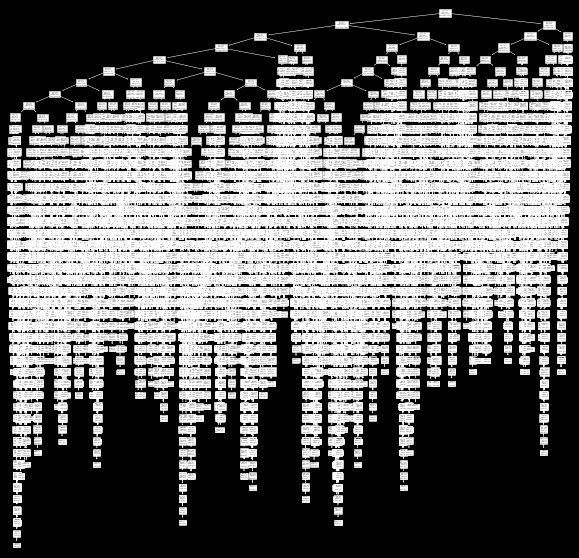

In [235]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('dark_background')
mpl.rcParams['text.color'] = 'black'
fig, ax = plt.subplots(figsize=(10, 10), facecolor='k')

#tree.plot_tree(clf) 
plot_tree(clf, rotate=True, ax=ax); 
plt.show()

In [ ]:
#ap_data = data[["性別","age","行業別_分類","現居地_區域","戶籍_區域","Salary","姻婚狀態","星座","曾登入行動銀行","月投資理財AP_202006"]]




ap_label = ap_data_dummy["季投資理財AP_2020Q2"]
ap_feature = ap_data_dummy.drop(["性別","戶籍_縣市","星座","Target_Y","label","季投資理財AP_2020Q2"],axis=1)




In [ ]:
ap_label.head(5)

In [ ]:
ap_feature.head(5)

In [ ]:
#data["行業別"].value_counts().to_frame()
#ap_data_dn["行業別_分類"].value_counts().to_frame()
ap_data["曾登入行動銀行"].value_counts().to_frame()
data["員工記號"].value_counts().to_frame()

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})

data.hist(bins=50, figsize=(20,20))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})

ap_data.hist(bins=50, figsize=(20,10))
plt.show()


In [ ]:
a = ap_data.shape 
print("{0}".format(a))

a = ap_label.shape 
print("{0}".format(a))

In [ ]:
ap_feature.info()
#train_ap_data.info()
#test_ap_data.info()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

sns.jointplot(x='Salary',y ='季投資理財AP_2020Q2', data = ap_data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})

plt.rcParams.update(
    {'font.sans-serif': 'Microsoft JhengHei', 'axes.unicode_minus': False})
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20, 15))


plt.scatter(y=ap_data["季投資理財AP_2020Q2"],x=ap_data["Salary"])

plt.show()

In [ ]:
ap_data.head(5)

In [ ]:
ap_feature.head(5)

In [ ]:
ap_label.head(5)

In [ ]:
from sklearn.model_selection import train_test_split

train_ap_data, test_ap_data, train_ap_label, test_ap_label = train_test_split(ap_feature, ap_label)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
reg = linear_model.LinearRegression()

In [ ]:
reg.fit(train_ap_data,train_ap_label)

In [ ]:
reg.score(train_ap_data,train_ap_label)

In [ ]:
reg.score(test_ap_data,test_ap_label)

In [ ]:
a = reg.intercept_
print("intercept: {0}".format(a))
      
a = reg.coef_
print("coef: {0}".format(a))    

a = train_ap_data.columns
print("x_columns: {0}".format(a))    